In [1]:
import pandas as pd

In [2]:
event = pd.read_excel('.\\activity_data_compiled v3.xlsx')

In [3]:
product = pd.read_excel('.\\activity_data_compiled v3.xlsx',sheet_name = 'product clicks_price')

In [4]:
product

,customer_id,campaign_id,activity_type,category,product_id,clicks,original_price,discount_price,click_revenue,remark
0,2,12822,live,GOODS,150848,184,329000,266490,49034160,NaN
1,2,5333,live,GOODS,49363,66,299000,254150,16773900,NaN
2,2,9012,live,GOODS,89073,177,99000,75735,13405095,NaN
3,2,12587,live,GOODS,147292,842,348000,174000,146508000,NaN
4,2,5567,live,GOODS,56993,135,650000,442000,59670000,NaN
...,...,...,...,...,...,...,...,...,...,...
35096,171,9154,live,GOODS,89661,182,159000,49900,9081800,NaN
35097,171,12635,live,GOODS,147774,155,32000,27500,4262500,NaN
35098,171,12238,live,GOODS,94343,3,2228000,2116600,6349800,NaN
35099,171,8520,live,GOODS,84209,7,5490000,3705750,25940250,NaN


In [5]:
event

,customer_id,campaign_id,activity_type,viewers,pageviews,duration,chats,likes,date
0,171,10139,live,520,631,1.545634e+05,103,280,2023-08-07
1,164,7390,live,533,784,1.648366e+05,199,19485,2023-05-04
2,17,726,live,538,774,2.046831e+05,61,4210,2021-10-26
3,164,7822,live,538,794,1.583615e+05,437,2242,2023-06-22
4,171,12778,live,558,613,2.858400e+04,21,6,2023-11-01
...,...,...,...,...,...,...,...,...,...
2171,51,11989,live,235414,265633,9.357605e+06,2459,18645,2023-10-11
2172,51,11695,live,237648,253930,5.787295e+06,4515,24839,2023-10-19
2173,51,12754,live,259970,288794,1.627862e+07,3196,31731,2023-10-31
2174,82,11629,live,266270,293050,7.969703e+06,608,28670,2023-10-04


In [6]:
product = product[['customer_id','campaign_id','product_id','clicks','original_price','discount_price','click_revenue']]
product_count = product[['customer_id','campaign_id','product_id']].groupby(by=['customer_id','campaign_id']).count().reset_index()
product_agg = product[['customer_id','campaign_id','clicks','original_price','discount_price','click_revenue']].groupby(by=['customer_id','campaign_id']).sum().reset_index()
product_agg = product_agg.merge(product_count,on=['customer_id','campaign_id'])

In [7]:
event_agg = event.merge(product_agg,on=['customer_id','campaign_id'])
event_agg.to_csv('event_agg.csv')

In [8]:
event_agg

,customer_id,campaign_id,activity_type,viewers,pageviews,duration,chats,likes,date,clicks,original_price,discount_price,click_revenue,product_id
0,171,10139,live,520,631,1.545634e+05,103,280,2023-08-07,110,185000,173400,5373900,3
1,164,7390,live,533,784,1.648366e+05,199,19485,2023-05-04,816,4244000,3819600,131658300,20
2,164,7822,live,538,794,1.583615e+05,437,2242,2023-06-22,627,4182000,3543220,114391260,19
3,171,12778,live,558,613,2.858400e+04,21,6,2023-11-01,834,153000,121510,20999770,5
4,164,8686,live,574,909,1.501274e+05,248,22852,2023-07-03,929,2399000,1395230,74765550,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,51,11708,live,213389,235034,7.655282e+06,3692,10108,2023-10-13,9321,5496000,4671600,3498306750,16
1626,51,11989,live,235414,265633,9.357605e+06,2459,18645,2023-10-11,15111,7134000,6410000,4686692250,26
1627,51,11695,live,237648,253930,5.787295e+06,4515,24839,2023-10-19,15562,7906000,6724800,2503515750,48
1628,51,12754,live,259970,288794,1.627862e+07,3196,31731,2023-10-31,25101,4778000,3775900,4515078200,21


In [9]:
product['disc'] =  (product['original_price']-product['discount_price'])/product['original_price']
product171 = product[product['customer_id']==171]
product171

C:\Users\mitra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,campaign_id,product_id,clicks,original_price,discount_price,click_revenue,disc
29070,171,10138,79820,23,428000,380920,8761160,0.110000
29071,171,9799,84577,56,54900,47610,2666160,0.132787
29072,171,10145,87989,189,32900,25900,4895100,0.212766
29073,171,7912,78685,174,49900,44010,7657740,0.118036
29074,171,7912,78689,12,54900,49410,592920,0.100000
...,...,...,...,...,...,...,...,...
35096,171,9154,89661,182,159000,49900,9081800,0.686164
35097,171,12635,147774,155,32000,27500,4262500,0.140625
35098,171,12238,94343,3,2228000,2116600,6349800,0.050000
35099,171,8520,84209,7,5490000,3705750,25940250,0.325000


In [10]:
product171.sort_values('product_id')
product171_byproduct = product171.groupby(by='product_id').mean().reset_index()
product171_byproduct =  product171_byproduct.dropna()
data= product171_byproduct.copy()

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np
features = data[['original_price', 'disc', 'clicks']]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

z_score_threshold = 3

outliers = np.where(np.abs(features_standardized) > z_score_threshold)

data_no_outliers = data.drop(data.index[outliers[0]])

In [12]:
data = data_no_outliers.copy()

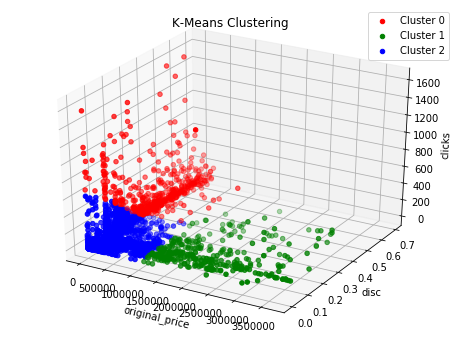

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


features = data_no_outliers[['original_price', 'disc', 'clicks']]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

num_clusters =3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(features_standardized)

data['cluster'] = kmeans.labels_

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_data = data[data['cluster'] == cluster_label]
    ax.scatter(cluster_data['original_price'], cluster_data['disc'], cluster_data['clicks'], c=color, label=f'Cluster {cluster_label}')

ax.set_xlabel('original_price')
ax.set_ylabel('disc')
ax.set_zlabel('clicks')
ax.set_title('K-Means Clustering')
ax.legend()

plt.show()


In [15]:
data.to_csv('.\clustered_products.csv')